# Brazil-E-Commerce

# 1. Formalitäten

## 1.1 Packages

In [2]:
#Fundamentals
import os
import numpy as np
import pandas as pd
#Datenvisualisierung
import matplotlib.pyplot as plt
import seaborn as sns
#Statistics
import scipy.stats as stats 
import statsmodels.api as sm
#Zeitreihen
import datetime
import zipfile
#Mathe
from math import radians, cos, sin, asin, sqrt

#REST

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



## 1.2 Dataset

In [3]:
zip_path = "C:/Users/Dell/Documents/SQL/Brazil-E-Commerce-Data.zip"
extract_path = "C:/Users/Dell/Documents/SQL"

In [4]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

files = os.listdir(extract_path)
print("Extracted data: ", files)

Extracted data:  ['Brazil-E-Commerce-Data.zip', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [5]:
csv_files = [f for f in files if f.endswith(".csv")]

dfs = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

for file, df in dfs.items():
    print(f"\n {file}:")
    print(df.shape)


 olist_customers_dataset.csv:
(99441, 5)

 olist_geolocation_dataset.csv:
(1000163, 5)

 olist_orders_dataset.csv:
(99441, 8)

 olist_order_items_dataset.csv:
(112650, 7)

 olist_order_payments_dataset.csv:
(103886, 5)

 olist_order_reviews_dataset.csv:
(99224, 7)

 olist_products_dataset.csv:
(32951, 9)

 olist_sellers_dataset.csv:
(3095, 4)

 product_category_name_translation.csv:
(71, 2)


### 1.2.1 Bennenung Datasets

In [6]:
df_customer_raw = dfs["olist_customers_dataset.csv"]
df_geo_raw = dfs["olist_geolocation_dataset.csv"]
df_order_raw = dfs["olist_orders_dataset.csv"]
df_item_raw = dfs["olist_order_items_dataset.csv"]
df_payment_raw = dfs["olist_order_payments_dataset.csv"]
df_review_raw = dfs["olist_order_reviews_dataset.csv"]
df_product_raw = dfs["olist_products_dataset.csv"]
df_seller_raw = dfs["olist_sellers_dataset.csv"]
df_category_raw = dfs["product_category_name_translation.csv"] #Enthält translation -> brauchst du zum umwandeln. kuss



# 2. Data Cleaning 

## 2.1 Dataset Customer

In [7]:
df_customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### 2.1.1 NA

In [8]:
df_customer_raw.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Keine fehlenden Werte.

### 2.1.2 Duplikate

In [9]:
df_customer_raw.duplicated().sum().sum()

0

Keine Duplikate.

### 2.1.3 Analyse zur Bestimmung Hypothesen

In [10]:
df_customer_raw.customer_city.value_counts().head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

In [11]:
df_customer_raw.customer_state.value_counts(100).head(15)

customer_state
SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
SC    0.036574
BA    0.033990
DF    0.021520
ES    0.020444
GO    0.020314
PE    0.016613
CE    0.013435
PA    0.009805
MT    0.009121
MA    0.007512
Name: proportion, dtype: float64

Die meisten Kunden kommen aus Sao Paulo oder Rio de Janeiro. Mit einem Anteil über 53 % nehmen sie den Großteil der Kundschaft ein.

## 2.2 Geo-Location

In [12]:
df_geo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### 2.2.1 NA

In [13]:
df_geo_raw.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Keine fehlenden Werte

### 2.2.2 Duplikate

In [14]:
df_geo_raw.duplicated().sum().sum()

261831

Sehr viele Duplikate. Werden folgend aus dem Datensatz entfernt.

In [15]:
df_geo_ed = df_geo_raw.drop_duplicates()

Verification

In [16]:
df_geo_ed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


## 2.3 Dataset Order

In [17]:
df_order_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### 2.3.3 NA

In [18]:
df_order_raw.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Die Bewilligung der Bestellung, Übergabe an den Lieferanten und Übergabe an den Kunden erhalten fehlende Werte. 

Eine  Erklärung wäre die Verhinderung der Lieferung durch beispielsweise dem Ausfall der Zahlung oder ähnliches.

Dies wird untersucht um mögliche Zusammenhänge und ein weiteres Vorgehen mit den fehlenden Werten zu klären.

In [19]:
df_order_raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
df_order_raw.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Der Order Status hat genauere Informationen über die fehlende Werte. Canceled, unavaiable,...

In [21]:
df_order_raw.loc[df_order_raw["order_status"] == "shipped"].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00


In [22]:
df_order_raw.loc[df_order_raw["order_status"] == "canceled"].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaN,NaN,2018-07-03 00:00:00
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaN,NaN,2018-08-22 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaN,NaN,2017-03-30 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00


Canceled kann also sowohl schon bei der Bestätigung der Lieferung, wie auch danach erfolgen.

In [23]:
df_order_raw.loc[df_order_raw["order_status"] == "unavailable"].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00


In [24]:
df_order_raw.loc[df_order_raw["order_status"] == "invoiced"].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaN,NaN,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaN,NaN,2017-12-20 00:00:00


In [25]:
df_order_raw.loc[df_order_raw["order_status"] == "processing"].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00
1582,d815bd2c2bdd79e4c0e0263caa986d66,04d7d73089b39d83f81b829cbd98e43d,processing,2017-03-15 10:30:17,2017-03-15 10:30:17,NaN,NaN,2017-04-13 00:00:00
1604,52b828f13e08788433adad4a7d135779,3c9a7cf7435eb8c2afd717c62809b521,processing,2018-05-05 22:32:38,2018-05-05 22:53:19,NaN,NaN,2018-06-01 00:00:00
1619,56ab0ef6726f49b711b84ce62e305c7c,5a643f32f961a09e6046bad513aa588b,processing,2017-11-21 17:54:26,2017-11-22 17:59:31,NaN,NaN,2017-12-13 00:00:00
2126,4ea3508e2de6e58640c0efe3ef758829,75776b1f1b023dd82d5fafe940616c1e,processing,2017-05-21 23:42:14,2017-05-22 00:35:23,NaN,NaN,2017-06-21 00:00:00
2198,533e104c4193cf07d264603f7800fb71,2f95fc8f86679d432d77e9d0316fac48,processing,2017-02-06 15:33:57,2017-02-06 15:42:27,NaN,NaN,2017-03-03 00:00:00


In [26]:
delivery_list = ["delivered", "shipped"]
df_order_raw.loc[df_order_raw["order_status"].isin(delivery_list)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Trennen der Datensätze mit nicht erfolgreichen Lieferung zur Analyse einer Hypothese.**

In [27]:
df_order_na_ed = df_order_raw[~df_order_raw["order_status"].isin(delivery_list)].copy()

Verifizierung

In [28]:
df_order_na_ed.order_status.value_counts()

order_status
canceled       625
unavailable    609
invoiced       314
processing     301
created          5
approved         2
Name: count, dtype: int64

Datensatz für Erfolgreiche Bestellungen

In [29]:
df_order_ed = df_order_raw.dropna().copy()

In [30]:
df_order_ed["order_status"].unique()

array(['delivered', 'canceled'], dtype=object)

In [31]:
df_order_ed.loc[df_order_ed["order_status"]== "canceled"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00


In [32]:
df_order_ed.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 2.3.2 Duplikate

In [33]:
df_order_raw.duplicated().sum().sum()

0

Keine Duplikate.

### 2.3.3 Hypothesenbildung

**Hypothesen:** 

- Durchschnittliche Lieferzeit (Kauf → Ankunft) nach Produkt
- Geplante vs. Tatsächliche Lieferung
- Übergabe Zeit von Seller zu Lieferant
- Produktkategorie von nicht erfüllten Bestellungen (df_order_na_raw)



## 2.4 DF Item

In [34]:
df_item_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### 2.4.1 NA

In [35]:
df_item_raw.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Keine fehlenden Werte

### 2.4.2 Duplikate

In [36]:
df_item_raw.duplicated().sum().sum()

0

Keine Duplikate.

**Das ist der Datensatz der für die weitere Analyse am wertvollsten ist, da er viele Primary Keys beiinhaltet. order_id, seller_id, product_id.**

**Hypothesen** (nur für den Datensatz): 

Unterschiede der Versandkosten nach Hersteller.

## 2.5 Dataset Payment

In [37]:
df_payment_raw.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 2.5.1 NA

In [38]:
df_payment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Keine NA's.

### 2.5.2 Duplikate

In [39]:
df_payment_raw.duplicated().sum().sum()

0

Keine Duplikate.

### 2.5.3 Analyse und Hypothesenbildung

In [40]:
df_payment_raw.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Aufgrund der geringen Anzahl an not_defined, werden die Zeilen mit der Ausprägung gedroppt.

In [41]:

df_payment_ed = df_payment_raw[df_payment_raw['payment_type'] != "not_defined"]


In [42]:
df_payment_ed.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

Keine NA's.

In [43]:
df_payment_raw.duplicated().sum().sum()

0

Keine Duplikate

### 2.5.3 Analyse: Gibt es Lieferanten die nur credit-Karte annehmen,...

## 2.6 Dataset Review

In [44]:
df_review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
df_review_raw.review_answer_timestamp.head()

0    2018-01-18 21:46:59
1    2018-03-11 03:05:13
2    2018-02-18 14:36:24
3    2017-04-21 22:02:06
4    2018-03-02 10:26:53
Name: review_answer_timestamp, dtype: object

Die Daten werden in einem weiteren Abschnitt alle von **object** in **datetime** verwandelt. 

### 2.6.1 NA

In [46]:
df_review_raw.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Die Analyse basiert nicht auf der Analyse der Kommentare. Dementsprechend werden folgend diese Spalten gedroppt.

In [47]:
df_review_ed = df_review_raw.drop(columns= ["review_comment_title", "review_comment_message"])

Verifikation

In [48]:
df_review_ed.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

### 2.6.2 Duplikate

In [49]:
df_review_raw.duplicated().sum().sum()

0

Keine Duplikate

### 2.6.3 Hypothesen

- Was sind die Produkte mit den besten Bewertungen? 
- Wann werden die Sachen reviewed, ist eine vorherige Erinnerung nützlich?

## 2.7 Dataset Products

In [50]:
df_product_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### 2.7.1 NA

In [51]:
df_product_raw.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Da der Kategorie-Name notwendig ist für die jeweiligen Analysen und bessere Darstellung. Werden die fehlende Werte aus der Spalte entfernt. Die Länge des Namens, Description, photos sind nicht notwendig für die Analyse. 

Da die Maße des Produkts nur 2 fehlende Werte werden sie durch die Mittelwerte der jeweiligen Kategorie ersetzt. Kommt es zu einer Sinnabweichung werden sie entfernt.

In [52]:
df_product_raw.loc[df_product_raw["product_weight_g"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Zeile 18851 weißt nur fehlende Werte auf, also wird sie entfernt.

In [53]:
df_product_ed = df_product_raw.copy()
df_product_ed = df_product_raw.drop(18851)

Anpassung für die Zeile 8578 (Mittelwertsanpassung wird hier nur vorgeführt, bei einer so geringen Zahl wird sie immer entfernt)

In [54]:
df_product_raw.loc[df_product_raw["product_category_name"]=="bebes"].describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,919.000000,919.000000,919.000000,918.000000,918.000000,918.000000,918.000000
mean,46.056583,824.261153,2.352557,3655.201525,37.147059,21.617647,28.717865
std,11.382298,544.414530,1.735121,5665.129577,17.945730,16.591138,13.964589
min,7.000000,4.000000,1.000000,50.000000,14.000000,2.000000,8.000000
25%,38.000000,381.000000,1.000000,400.000000,23.000000,10.000000,16.000000
50%,49.000000,728.000000,2.000000,850.000000,33.000000,16.000000,25.000000
75%,55.500000,1133.000000,3.000000,5106.250000,45.000000,30.000000,40.000000
max,64.000000,3923.000000,19.000000,30000.000000,102.000000,97.000000,84.000000


In [55]:
def meanfill(df, columns):
    for col in columns: 
        df[col] = df[col].fillna(df[col].mean())
    return df

In [56]:
columns_to_fill = ['product_length_cm', 'product_weight_g', 'product_height_cm', 'product_width_cm']

df_product_ed = meanfill(df_product_ed, columns_to_fill)

Verification

In [57]:
df_product_ed["product_width_cm"].isna().sum()

0

Nun werden noch die restlichen Na entfernt und die Spalten product_name_lenght, product_description_lenght, product_photos_qty entfernt.           

In [58]:
df_product_ed = df_product_ed.dropna()

In [59]:
df_product_ed = df_product_ed.drop(columns=["product_name_lenght", "product_description_lenght", "product_photos_qty"], axis= 1)

### 2.7.2 Duplikate

In [60]:
df_product_raw.duplicated().sum().sum()

0

Keine Duplikate

### 2.7.3 Hypothesen

- Das Gewicht/Volumen des Pakets ist ausschlaggebend für die Versand kosten (freigth_value)
- Welche Kategorien haben die größten Pakete (Bessere Einschätzung der Kategorie)

## 2.8 Dataset Seller 


In [61]:
df_seller_raw.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 2.8.1 NA

In [62]:
df_seller_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Keine NA 

### 2.8.2 Duplikate

In [63]:
df_seller_raw.duplicated().sum().sum()

0

Keine Duplikate.

### 2.8.3 Hypothesen

- Woher kommen die meisten Seller, gibt es eine Niederlassung wo die meisten Seller sind.
- Viele weitere Fragen beim Verbinden der Datensätze

## 2.9 Dataset Category

In [64]:
df_category_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [65]:
df_category_raw.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [66]:
df_category_raw.duplicated().sum().sum()

0

Dieser Datensatz wird nur verwendet um die Kategorien des Produkt-Datensatz zu übersetzen für bessere Verständlichkeit.

### 2.9.1 Einsetzen Product_Category

In [67]:
df_product_ed.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [68]:
df_product_ed_eng = pd.merge(left = df_product_ed, right = df_category_raw, how= "left" ,on= "product_category_name")


In [69]:
df_product_ed_eng["product_category_name_english"].isna().sum()

13

Wir haben 13 Bestellungen die keiner Produkt-Kategorie zugewiesen konnten.

In [70]:
df_product_ed_eng.loc[df_product_ed_eng["product_category_name_english"].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,650.0,16.0,22.0,20.0,NaN
8648,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,850.0,30.0,21.0,22.0,NaN
10823,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,1200.0,25.0,33.0,25.0,NaN
13996,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,10600.0,40.0,20.0,38.0,NaN
15875,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,750.0,30.0,30.0,30.0,NaN
16609,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,800.0,18.0,22.0,22.0,NaN
17460,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,7350.0,40.0,30.0,23.0,NaN


Die NA-Werte gehören 2 Kategorien an, die ersetzt werden. 

2 Kategorien: 

- pc_gamer
- portable_kitchen_and_food_preparators (portateis_cozinha_e_preparadores_de_alimentos)

In [71]:
df_product_ed_eng["product_category_name_english"] = df_product_ed_eng["product_category_name_english"].fillna(df_product_ed_eng["product_category_name"])

df_product_ed_eng.loc[df_product_ed_eng["product_category_name_english"] == "portateis_cozinha_e_preparadores_de_alimentos","product_category_name_english"] = "portable_kitchen_and_food_preparators"

In [72]:
df_product_ed_eng = df_product_ed_eng.drop("product_category_name", axis= 1)

In [73]:
df_product_ed_eng = df_product_ed_eng.rename(columns = {"product_category_name_english" : "product_category_name"})

Verifikation

In [74]:
df_product_ed_eng.head()

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,625.0,20.0,17.0,13.0,housewares


## 2.10 Anpassung Timestamps

In dem Datensatz sind viele Daten vorhanden die als Object gespeichert sind. Diese werden nun als Datetime gespeichert um eine Zeitanalyse zu ermöglichen.

In [75]:
df_order_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [76]:
df_order_ed["order_purchase_timestamp"] = pd.to_datetime(df_order_ed["order_purchase_timestamp"], errors ="coerce" )
df_order_ed["order_approved_at"] = pd.to_datetime(df_order_ed["order_approved_at"], errors ="coerce" )
df_order_ed["order_delivered_carrier_date"] = pd.to_datetime(df_order_ed["order_delivered_carrier_date"], errors ="coerce" )
df_order_ed["order_delivered_customer_date"] = pd.to_datetime(df_order_ed["order_delivered_customer_date"], errors ="coerce" )
df_order_ed["order_estimated_delivery_date"] = pd.to_datetime(df_order_ed["order_estimated_delivery_date"], errors ="coerce" )

df_order_na_ed["order_purchase_timestamp"] = pd.to_datetime(df_order_na_ed["order_purchase_timestamp"], errors ="coerce" )
df_order_na_ed["order_approved_at"] = pd.to_datetime(df_order_na_ed["order_approved_at"], errors ="coerce" )
df_order_na_ed["order_delivered_carrier_date"] = pd.to_datetime(df_order_na_ed["order_delivered_carrier_date"], errors ="coerce" )
df_order_na_ed["order_delivered_customer_date"] = pd.to_datetime(df_order_na_ed["order_delivered_customer_date"], errors ="coerce" )
df_order_na_ed["order_estimated_delivery_date"] = pd.to_datetime(df_order_na_ed["order_estimated_delivery_date"], errors ="coerce" )

df_item_raw["shipping_limit_date"] = pd.to_datetime(df_item_raw["shipping_limit_date"], errors ="coerce" )
df_review_raw["review_answer_timestamp"] = pd.to_datetime(df_review_raw["review_answer_timestamp"], errors ="coerce")



**Kontrolle, ob bei allen Bestellungen der Kauf vor der Lieferung stattgefunden hat. Um Fehler zu vermeiden.**

In [77]:
if (df_order_ed["order_purchase_timestamp"] <= df_order_ed["order_delivered_customer_date"]).all():
    print("True")
else:
    print("False")

True


In [78]:
if (df_order_ed["order_delivered_carrier_date"] < df_order_ed["order_purchase_timestamp"]).all():
    print("True")
else:
    print("False")

False


In [79]:
df_order_ed.loc[df_order_ed["order_delivered_carrier_date"] < df_order_ed["order_purchase_timestamp"]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,2018-08-16 14:05:13,2018-08-16 13:27:00,2018-08-24 14:58:37,2018-09-04
1111,ad133696906f6a78826daa0911b7daec,e6f5b234bb0d847f10eebd70130c5d49,delivered,2018-06-15 15:41:22,2018-06-15 16:19:23,2018-06-15 14:52:00,2018-06-22 18:09:37,2018-07-18
1329,74e033208dc13a7b8127eb8e73d09b76,72fcbb1145f2889eddcba6d6c1d6c090,delivered,2018-05-02 10:48:44,2018-05-02 11:13:45,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29
1372,a6b58794fd2ba533359a76c08df576e3,ccd8e3459ad58ae538c9d2cf35532ba4,delivered,2018-05-14 15:18:23,2018-05-14 15:33:35,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08
1864,5792e0b1c8c8a2bf53af468c9a422c88,5c427f06e7fcf902e309743516e2c580,delivered,2018-07-26 13:25:14,2018-07-26 13:35:14,2018-07-26 12:42:00,2018-07-30 14:45:02,2018-08-09
...,...,...,...,...,...,...,...,...
98172,f7780ea2807db31691e83f0013294035,3088cc4bfafe311f1d84830808c2aa6d,delivered,2018-07-30 15:22:15,2018-07-30 15:35:16,2018-07-30 15:00:00,2018-08-02 18:32:30,2018-08-02
98430,d7646ffe8fdd9e7d9557f9f7cbf04530,f896e70d84f6db9a56b86a47dd8718f0,delivered,2018-05-04 14:50:37,2018-05-04 15:10:22,2018-05-04 14:48:00,2018-05-08 19:06:42,2018-05-16
98672,5ded8a3706eabd813685534724f066de,460316e38d4d241fc79d4f6729f8f7f6,delivered,2018-07-18 08:46:52,2018-07-18 09:01:48,2018-07-18 08:44:00,2018-07-25 13:53:17,2018-08-10
98780,d10046876c7d9f01613da59ffa6cb07f,6559cb5b365f173915f766fefcd86972,delivered,2018-07-18 16:14:16,2018-07-18 16:25:17,2018-07-18 15:34:00,2018-07-23 20:46:44,2018-08-07


Dies ist nicht möglich also werden die Daten entfernt. 

In [80]:
df_order_ed = df_order_ed[~(df_order_ed["order_delivered_carrier_date"] < df_order_ed["order_purchase_timestamp"])]

## 2.11 Anpassungen der Daten

### 2.11.1 Volumen der Pakete

Das Volumen der Pakete wird berechnet, um später eine Analyse hinsichtlich der Lieferkosten zu ermöglichen.

In [81]:
def calc_volume(df):
    df["product_volume_cm3"] = df["product_length_cm"]* df["product_height_cm"] * df["product_width_cm"]
    return df

In [82]:
df_product_ed_eng = calc_volume(df_product_ed_eng)

Verifikation

In [83]:
df_product_ed_eng.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
count,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
mean,2276.956571,30.854544,16.958812,23.208596,16577.823048
std,4279.225683,16.955703,13.635904,12.078575,27062.571149
min,0.000000,7.000000,2.000000,6.000000,168.000000
25%,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,700.000000,25.000000,13.000000,20.000000,6860.000000
75%,1900.000000,38.000000,21.000000,30.000000,18522.000000
max,40425.000000,105.000000,105.000000,118.000000,296208.000000


### 2.11.2 Datetime für Monat und Jahr

Um eine Zeitanalyse zu ermöglichen und Zusammenhänge zu erkennen, werden bei den Daten sowohl der Monat wie auch Jahr extrahiert.
Somit lassen sich zeitliche Entwicklungen und Trends besser darstellen. 

Da in der Analyse nur die Tätigung der Bestellung, sowie der Lieferungstag oder der angestrebte Lieferungstag von Interesse ist, wird es auch nur für diese Spalten gemacht.

Mit diesen Vorgehen sollen bsp.weise saisonale Trends (Bsp. Weihnachten, Sommer vs. Winter) ermittelt werden. 

In [84]:
df_order_ed.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [85]:
df_order_ed["month_pur"] = df_order_ed["order_purchase_timestamp"].dt.month
df_order_ed["year_pur"] = df_order_ed["order_purchase_timestamp"].dt.year

df_order_ed["month_est"]=df_order_ed["order_estimated_delivery_date"].dt.month
df_order_ed["year_est"]=df_order_ed["order_estimated_delivery_date"].dt.month

df_order_ed["month_del"]= df_order_ed["order_delivered_customer_date"].dt.month
df_order_ed["year_del"]=df_order_ed["order_delivered_customer_date"].dt.month


## 2.12 Erstellen der Bereinigten Datensätze

### Cleaned Datasets

In [86]:
df_seller_cl = df_seller_raw.copy()
df_customer_cl = df_customer_raw.copy()
df_geo_cl = df_geo_ed.copy()
df_item_cl = df_item_raw.copy()
df_order_cl = df_order_ed.copy()
df_order_na_cl = df_order_na_ed.copy()
df_payment_cl = df_payment_ed.copy()
df_review_cl = df_review_raw.copy()
df_product_cl = df_product_ed_eng.copy()


In [87]:
df_seller_cl.to_csv('seller_cleaned.csv', index=False)
df_customer_cl.to_csv('customer_cleaned.csv', index=False)
df_geo_cl.to_csv('geo_cleaned.csv', index=False)
df_item_cl.to_csv('item_cleaned.csv', index=False)
df_order_cl.to_csv('order_cleaned.csv', index=False)
df_order_na_cl.to_csv('order_na_cleaned.csv', index=False)
df_payment_cl.to_csv('payment_cleaned.csv', index=False)
df_review_cl.to_csv('review_cleaned.csv', index=False)
df_product_cl.to_csv('product_cleaned.csv', index=False)

# 3. Explorative Fragen

**Produkte**

## 3.1 Welche Produkte sind die beliebtesten?


### 3.1.2 Analyse

Das Problem der Product-ID wird folgend kurz illustriert.

In [88]:
df_item_cl["product_id"].value_counts().head(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

Dieser Code sagt uns weder welches Produkt bestellt wurde, noch welcher Kategorie es angehört. Somit könnten die 5 beliebtesten Produkte auch alles beispielsweise Parfums sein.

Folgend werden die Datensätze über den PK product_id verbunden und die beliebtesten Produkt_Kategorien aufgeführt.

In [89]:
Q1_df = pd.merge(df_item_cl, df_product_cl, on="product_id", how="left")

In [90]:
Q1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,650.0,28.0,9.0,14.0,cool_stuff,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,30000.0,50.0,30.0,40.0,pet_shop,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3050.0,33.0,13.0,33.0,furniture_decor,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,200.0,16.0,10.0,15.0,perfumery,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,3750.0,35.0,40.0,30.0,garden_tools,42000.0


In [91]:
Q1_df["product_category_name"].value_counts().head(10)

product_category_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

**Wie ist der Preis für die beliebtesten Produkte im Vergleich zu allen Produkten?**


In [92]:
best_category = Q1_df["product_category_name"].value_counts(100).head(10).index

In [93]:
Q1_df["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [94]:
Q1_df.loc[Q1_df["product_category_name"].isin(best_category)]["price"].describe()

count    71669.000000
mean       113.917234
std        165.466800
min          1.200000
25%         39.900000
50%         69.900000
75%        129.900000
max       6735.000000
Name: price, dtype: float64

**Die beliebtesten Kategorien sind preiswerter als der Durchschnitt.**

## 3.2 Gibt es regionale oder saisonale Verkaufsmuster?

### 3.2.2 Analyse Regionaler Unterschiede

**Woher kommen die meisten Kunden?**

In [95]:
Q2_df = pd.merge(df_order_cl, df_customer_cl, on = "customer_id", how = "left")

In [96]:
Q2_df["customer_city"].value_counts().head(10)

customer_city
sao paulo                15024
rio de janeiro            6595
belo horizonte            2689
brasilia                  2068
curitiba                  1486
campinas                  1406
porto alegre              1336
salvador                  1185
guarulhos                 1142
sao bernardo do campo      910
Name: count, dtype: int64

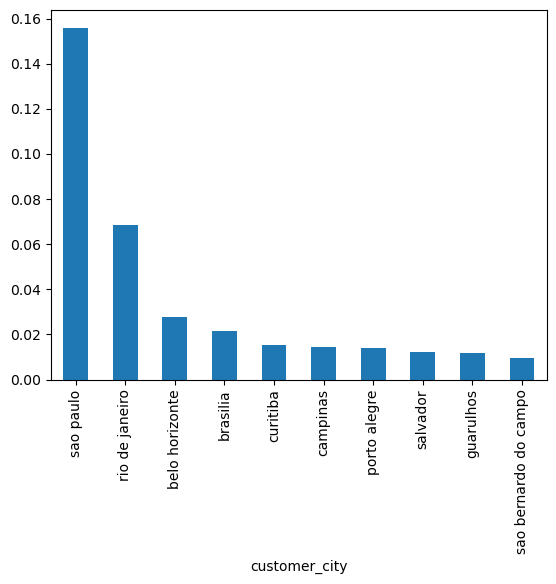

In [97]:
Q2_df["customer_city"].value_counts(100).head(10).plot(kind = "bar");

Die meisten Menschen bestellen aus den Großstädten Sao Paulo und Rio de Janeiro (ca. 22% aller Bestellungen). 

### 3.2.3 Analyse saisonale Unterschiede

In [98]:
Q2_df["month_pur"].value_counts()

month_pur
8     10499
5     10264
7      9991
3      9549
6      9185
4      9094
2      8197
1      7817
11     7288
12     5514
10     4748
9      4150
Name: count, dtype: int64

In [99]:
Q2_df["month_est"].value_counts()

month_est
8     13350
3     11151
5     10729
7     10263
4      8709
6      8053
12     7199
2      6433
9      6203
1      5468
11     4676
10     4062
Name: count, dtype: int64

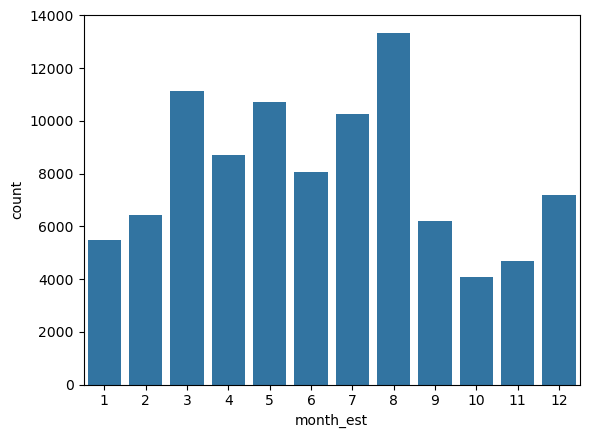

In [100]:
sns.countplot(x = "month_est", data= Q2_df);

**Lineplot, damit die Trends besser nachvollziehbar sind.**

In [101]:
grouped_month = Q2_df.copy()

grouped_month = grouped_month.groupby("month_pur")["order_id"].count().reset_index().sort_values(by="month_pur", ascending= True)
grouped_month.columns = ["month_pur", "order_count"]
grouped_month["month_pur"] = grouped_month["month_pur"].astype(str)
grouped_month

,month_pur,order_count
0,1,7817
1,2,8197
2,3,9549
3,4,9094
4,5,10264
5,6,9185
6,7,9991
7,8,10499
8,9,4150
9,10,4748


In [102]:
fig = px.line(
    grouped_month,
    x="month_pur",
    y="order_count",
    markers=True,
    title="Bestellungen pro Monat"
)
fig.update_layout(xaxis_title="Monat", yaxis_title="Anzahl Bestellungen")
fig.show()

## 3.3 Wie hängen Größe und Gewicht eines Produkts oder Wert mit Versandkosten zusammen?

### 3.3.1 Übersicht verwendeter Datensätze zur Exploration

### 3.3.2 Analyse

In [103]:
Q3_df = pd.merge(df_item_cl, df_product_cl, on="product_id", how="left")

In [104]:
Q3_df[["product_weight_g", "product_volume_cm3", "freight_value", "price"]].corr()

,product_weight_g,product_volume_cm3,freight_value,price
product_weight_g,1.000000,0.801618,0.611345,0.339854
product_volume_cm3,0.801618,1.000000,0.587600,0.299063
freight_value,0.611345,0.587600,1.000000,0.414204
price,0.339854,0.299063,0.414204,1.000000


In [106]:
Q3_df.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

 Die Versandkosten zeigen bei allen 3 Variablen positive Zusammenhänge. Allerdings ist es durch Ausreißer belastet, wenn man die Abbildungen mit den durchschnittlichen Kosten und Quartilen vergleicht.

__________________________________________________________________________________________________________________________________________________________________________________

**Nun analysieren wir das Kundenverhalten**

## 3.4 Wer sind die Top-Kunden?

### 3.4.1 Übersicht verwendeter Datensätze zur Exploration

In [107]:
Q4_df = pd.merge(df_order_cl, df_payment_cl, on= "order_id", how = "left")
Q4_df = Q4_df.merge(df_customer_cl, on = "customer_id", how="left")

Das Zusammenfügen der Datensätze führt zu einer Zeile mit NAN-Werten. Da es nur eine Spalte ist wird sie entfernt.

In [108]:
Q4_df.loc[Q4_df["payment_type"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_pur,year_pur,...,month_del,year_del,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
31116,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,9,2016,...,11,11,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP


In [109]:
Q4_df = Q4_df.dropna()

### 3.4.2 Top Kunden nach Payment Value

In [110]:
Q4_df.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending=False).head(20)

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13664.08
da122df9eeddfedc1dc1f5349a1a690c     7571.63
763c8b1c9c68a0229c42c9fc6f662b93     7274.88
dc4802a71eae9be1dd28f5d788ceb526     6929.31
459bef486812aa25204be022145caa62     6922.21
ff4159b92c40ebe40454e3e6a7c35ed6     6726.66
4007669dec559734d6f53e029e360987     6081.54
eebb5dda148d3893cdaf5b5ca3040ccb     4764.34
48e1ac109decbb87765a3eade6854098     4681.78
c8460e4251689ba205045f3ea17884a1     4655.91
edde2314c6c30e864a128ac95d6b2112     4513.32
a229eba70ec1c2abef51f04987deb7a5     4445.50
edf81e1f3070b9dac83ec83dacdbb9bc     4194.76
fa562ef24d41361e476e748681810e1e     4175.26
ca27f3dac28fb1063faddd424c9d95fa     4163.51
5e713be0853d8986528d7869a0811d2b     4042.74
58483a1c055dfb600f57c5b867174542     4034.44
011875f0176909c5cf0b14a9138bb691     4016.91
f0767ae738c3d90e7b737d7b8b8bb4d1     3979.55
bc5e25094a7d51b6aee35236572e64f4     3826.80
Name: payment_value, dtype: float64

Wir haben eine Kunden welcher 13664.08 ausgegeben hat. Diese Customer_id wird seperat gespeichert, um das Kaufverhalten zu analysieren. Vielleicht war es auch nur eine Bestellung in einem extrem hohen Wert. 

In [111]:
Top_customer_id = Q4_df.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending=False).head(1).index

In [112]:
Top_20_customer = Q4_df.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending=False).head(20).index

### 3.4.3 Woher kommen sie?

In [113]:
top_df = Q4_df.loc[Q4_df["customer_unique_id"].isin(Top_20_customer)]

In [114]:
top_df[("customer_state")].value_counts()

customer_state
SP    6
RJ    5
MG    4
RS    4
DF    2
ES    2
MS    1
PB    1
PA    1
Name: count, dtype: int64

Die Verteilung ähnelt der Anordnung wo am meisten bestellt wird.

In [115]:
top_df.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False)

customer_state
RJ    29660.76
SP    24055.67
MG    18247.11
ES    14197.09
MS     6929.31
PB     4681.78
RS     4655.91
DF     4194.76
PA     4042.74
Name: payment_value, dtype: float64

RJ, SP, MG, ES grenzen sich ab.

In [116]:
Q4_df.loc[Q4_df["customer_unique_id"].isin(Top_customer_id)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_pur,year_pur,...,month_del,year_del,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
13551,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,9,2017,...,10,10,1.0,credit_card,1.0,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ


Der Top Customer kommt aus Rio de Janeiro und hat nur einmal bestellt, dementsprechend ist eine weitere Kaufanalyse nicht interessant.

In [117]:
agg_item = df_item_cl.groupby("order_id").agg({
    "price": "sum",
    "freight_value": "sum",
    "order_item_id": "count"
}).reset_index()

In [118]:
Q4_df = Q4_df.merge(agg_item, on = "order_id", how="left")

In [119]:
Q4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100572 entries, 0 to 100571
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100572 non-null  object        
 1   customer_id                    100572 non-null  object        
 2   order_status                   100572 non-null  object        
 3   order_purchase_timestamp       100572 non-null  datetime64[ns]
 4   order_approved_at              100572 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100572 non-null  datetime64[ns]
 6   order_delivered_customer_date  100572 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100572 non-null  datetime64[ns]
 8   month_pur                      100572 non-null  int32         
 9   year_pur                       100572 non-null  int32         
 10  month_est                      100572 non-null  int32         
 11  

**Was ist der durchschnittliche Anzahl an Produkten und der durchschnittliche Warenkorbwert im Vergleich zu allen?** 

In [120]:
avg_product = Q4_df.groupby("customer_unique_id")["order_item_id"].mean().reset_index().rename(columns= {"order_item_id":"avg_value"})

In [121]:
avg_product.avg_value.describe()

count    93179.000000
mean         1.139552
std          0.526979
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: avg_value, dtype: float64

In [122]:
avg_warenkorb = Q4_df.groupby("customer_unique_id")["payment_value"].mean().reset_index().rename(columns= {"payment_value":"avg_value"})

In [123]:
avg_warenkorb.avg_value.describe()

count    93179.000000
mean       157.683883
std        217.006977
min          1.856818
25%         60.680000
50%        103.550000
75%        174.560000
max      13664.080000
Name: avg_value, dtype: float64

**Der Durchschnittliche Preis pro Warenkorb beträgt 157,65. Und Zumeist bestellen die Personen nicht mehr als 1 Produkt.**

## 3.5 Gibt es Hinweise auf Gründe für abgebrochene Bestellungen?

In [124]:
df_order_na_cl.customer_id.value_counts()

customer_id
ed0271e0b7da060a393796590e7b737a    1
4ae0a705c852353fbcdb27f8554b6655    1
3aa3badf42189513115df5858d5c2678    1
43b2ae9283ff026230ccdeaa82986b62    1
5a2e937ebdd78eaa8cac5dc67b8b3a42    1
                                   ..
247a1241b0292ffc8167f7391be2f7cc    1
7ef54c008d37c1051eec1537cb44a0db    1
3e4718dc40018dfaf06f5cf2638cff1d    1
b28927af041ac988a6e3f7bb60d9bc11    1
32c9df889d41b0ee8309a5efb6855dcb    1
Name: count, Length: 1856, dtype: int64

Es gibt keinen Zusammenhang mit einem bestimmten Kunden. Es sind einzelne Bestellungen.

In [125]:
Q5_df = df_order_na_cl.merge(df_payment_cl, on = "order_id", how= "left")

In [126]:
Q5_df.payment_type.value_counts()

payment_type
credit_card    1358
boleto          384
voucher         198
debit_card       21
Name: count, dtype: int64

Auch hier gibt es keinen Zusammenhang. mit einer bestimmten Zahlungsart.

In [127]:
Q5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1964 non-null   object        
 1   customer_id                    1964 non-null   object        
 2   order_status                   1964 non-null   object        
 3   order_purchase_timestamp       1964 non-null   datetime64[ns]
 4   order_approved_at              1803 non-null   datetime64[ns]
 5   order_delivered_carrier_date   78 non-null     datetime64[ns]
 6   order_delivered_customer_date  6 non-null      datetime64[ns]
 7   order_estimated_delivery_date  1964 non-null   datetime64[ns]
 8   payment_sequential             1961 non-null   float64       
 9   payment_type                   1961 non-null   object        
 10  payment_installments           1961 non-null   float64       
 11  payment_value    

In [128]:
Q5_df = Q5_df.merge(df_item_cl, on = "order_id", how= "left")
Q5_df = Q5_df.merge(df_product_cl, on = "product_id", how= "left")


In [129]:
Q5_df["product_category_name"].value_counts(100).head(20)

product_category_name
sports_leisure              0.084243
computers_accessories       0.079563
furniture_decor             0.079563
housewares                  0.079563
health_beauty               0.072543
watches_gifts               0.048362
telephony                   0.045242
toys                        0.045242
auto                        0.040562
baby                        0.039002
consoles_games              0.035101
bed_bath_table              0.034321
perfumery                   0.033541
garden_tools                0.033541
cool_stuff                  0.025741
stationery                  0.021841
musical_instruments         0.020281
fashion_bags_accessories    0.017941
electronics                 0.014041
small_appliances            0.013261
Name: proportion, dtype: float64

Es betrifft keine einzelnen Produktkategorien.

In [130]:
Q5_df["time_difference"] = (Q5_df["order_delivered_customer_date"] - Q5_df["order_purchase_timestamp"]).dt.days

In [131]:
Q5_df["time_difference"].mean()

18.0

In [132]:
((df_order_cl["order_delivered_customer_date"] - df_order_cl["order_approved_at"]).dt.days).mean()

11.650577386391959

**Die Lieferzeiten betragen durchschnittlich eine Woche mehr.** 

Das könnte ein Grund sein für abgebrochene Bestellungen.

In [133]:
Q5_df.payment_value.describe()

count    2148.000000
mean      231.571732
std       385.220894
min         0.070000
25%        63.397500
50%       116.295000
75%       232.512500
max      4809.440000
Name: payment_value, dtype: float64

In [134]:
df_payment_cl.payment_value.describe()

count    103883.000000
mean        154.104831
std         217.495628
min           0.000000
25%          56.800000
50%         100.000000
75%         171.840000
max       13664.080000
Name: payment_value, dtype: float64

**Ebenfalls die durchschnittlichen Preise sind höher, wie auch die Standardabweichung der Preise**

Dies könnte ein Grund sein für abgebrochene Bestellungen.

_______________________________________________________________________________________________________________________________________________________________________________________________

**Anbieter**

## 3.6 Wer sind die erfolgreichsten Verkäufer?

In [135]:
df_seller_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [136]:
df_order_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96296 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96296 non-null  object        
 1   customer_id                    96296 non-null  object        
 2   order_status                   96296 non-null  object        
 3   order_purchase_timestamp       96296 non-null  datetime64[ns]
 4   order_approved_at              96296 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96296 non-null  datetime64[ns]
 6   order_delivered_customer_date  96296 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96296 non-null  datetime64[ns]
 8   month_pur                      96296 non-null  int32         
 9   year_pur                       96296 non-null  int32         
 10  month_est                      96296 non-null  int32         
 11  year_est            

In [137]:
df_item_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [138]:
df_product_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32341 entries, 0 to 32340
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32341 non-null  object 
 1   product_weight_g       32341 non-null  float64
 2   product_length_cm      32341 non-null  float64
 3   product_height_cm      32341 non-null  float64
 4   product_width_cm       32341 non-null  float64
 5   product_category_name  32341 non-null  object 
 6   product_volume_cm3     32341 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.7+ MB


In [139]:
Q6_df = df_item_cl.copy()
Q6_df = Q6_df.merge(df_product_cl[["product_id", "product_category_name"]], on = "product_id", how = "left")
Q6_df = Q6_df.merge(df_order_cl[["order_id", "order_delivered_customer_date", "order_purchase_timestamp", "order_delivered_carrier_date"]], on="order_id", how="left")
Q6_df = Q6_df.merge(df_seller_cl, on= "seller_id", how="left")

In [140]:
Q6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   order_delivered_customer_date  109994 non-null  datetime64[ns]
 9   order_purchase_timestamp       109994 non-null  datetime64[ns]
 10  order_delivered_carrier_date   109994 non-null  datetime64[ns]
 11  

### 3.6.2 Wer sind die erfolgreichsten Verkäufer?


In [141]:
best_per_anb = Q6_df.groupby("seller_id")["order_id"].nunique().sort_values(ascending=False)

In [142]:
best_per_anb.describe()

count    3095.000000
mean       32.313409
std       105.139763
min         1.000000
25%         2.000000
50%         6.000000
75%        21.500000
max      1854.000000
Name: order_id, dtype: float64

In [143]:
best_per_anb.head(10)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
955fee9216a65b617aa5c0531780ce60    1287
7a67c85e85bb2ce8582c35f2203ad736    1160
ea8482cd71df3c1969d7b9473ff13abc    1146
4869f7a5dfa277a7dca6462dcf3b52b2    1132
3d871de0142ce09b7081e2b9d1733cb1    1080
Name: order_id, dtype: int64

In [144]:
Top_seller = best_per_anb.head(1).index

In [145]:
Top_10_seller = best_per_anb.head(10).index

In [146]:
Q6_df["product_category_name"].loc[Q6_df["seller_id"].isin(Top_10_seller)].value_counts()

product_category_name
bed_bath_table                             2849
watches_gifts                              2694
garden_tools                               1947
health_beauty                              1500
cool_stuff                                 1245
telephony                                  1207
stationery                                  883
perfumery                                   670
furniture_decor                             621
fashion_bags_accessories                    340
toys                                        303
home_confort                                243
housewares                                  242
baby                                        149
sports_leisure                              144
audio                                        88
construction_tools_lights                    57
auto                                         43
computers_accessories                        37
industry_commerce_and_business               33
home_comfort_2    

In [147]:
Q6_df["product_category_name"].loc[Q6_df["seller_id"].isin(Top_seller)].value_counts()

product_category_name
watches_gifts                1628
fashion_bags_accessories      340
audio                          32
perfumery                      13
computers_accessories          12
sports_leisure                  7
construction_tools_safety       1
Name: count, dtype: int64

Der beste Anbieter beschränkt sich auf diese Kategorien.

### 3.6.4 Lieferzeit

In [148]:
Q6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   order_delivered_customer_date  109994 non-null  datetime64[ns]
 9   order_purchase_timestamp       109994 non-null  datetime64[ns]
 10  order_delivered_carrier_date   109994 non-null  datetime64[ns]
 11  

Zuerst wird die Lieferzeit bestimmt durch die Differenz der Bestellungsanforderung und das Ankommen des Pakets.

In [149]:
Q6_df["order_time_diff"] = (Q6_df["order_delivered_customer_date"] - Q6_df["order_purchase_timestamp"]).dt.days
Q6_df["order_time_diff_2"] = (Q6_df["order_delivered_carrier_date"] - Q6_df["order_purchase_timestamp"]).dt.days

In [150]:
Q6_df["order_time_diff"].describe()

count    109994.000000
mean         12.016065
std           9.455047
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: order_time_diff, dtype: float64

In [151]:
Q6_df["order_time_diff"].loc[Q6_df["seller_id"].isin(Top_10_seller)].describe()

count    15215.000000
mean        12.086296
std          9.110194
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        208.000000
Name: order_time_diff, dtype: float64

In [152]:
Q6_df["order_time_diff"].loc[Q6_df["seller_id"].isin(Top_seller)].describe()

count    1992.000000
mean        9.051205
std         7.506260
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        78.000000
Name: order_time_diff, dtype: float64

In [153]:
Q6_df["order_time_diff_2"].describe()

count    109994.000000
mean          2.801889
std           3.627035
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         125.000000
Name: order_time_diff_2, dtype: float64

In [154]:
Q6_df.loc[Q6_df["order_time_diff_2"]<0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,order_delivered_customer_date,order_purchase_timestamp,order_delivered_carrier_date,seller_zip_code_prefix,seller_city,seller_state,order_time_diff,order_time_diff_2


**186 der Bestellungen sind vor dem eigentlichen Kauf, an den Lieferanten abgeben wurden. Das ist nicht möglich. Die Zeilen müssen also entfernt werden.** 

In [155]:
Q6_df.order_time_diff_2.loc[Q6_df["order_time_diff_2"]>0].describe()

count    88705.000000
mean         3.474336
std          3.738495
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        125.000000
Name: order_time_diff_2, dtype: float64

In [156]:
Q6_df.order_time_diff_2.loc[(Q6_df["order_time_diff_2"]>0) & (Q6_df["seller_id"].isin(Top_10_seller))].describe()

count    12484.000000
mean         2.764739
std          1.914290
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         29.000000
Name: order_time_diff_2, dtype: float64

In [157]:
Q6_df.order_time_diff_2.loc[(Q6_df["order_time_diff_2"]>0) & (Q6_df["seller_id"].isin(Top_seller))].describe()

count    1207.000000
mean        1.828500
std         1.167377
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: order_time_diff_2, dtype: float64

Die 10 Anbieter mit den meisten Bestellungen unterscheiden sich nicht von der Gesamtheit. 

Die Top 1 überzeugt mit einer schnelleren Lieferzeit.

Diagramm wäre super. Vergleich Lieferzeit mit Entfernung + Vergleich mit Lieferant.

In [158]:
df_top_10_seller = Q6_df[Q6_df["seller_id"].isin(Top_10_seller)]
df_top_1_seller = Q6_df[Q6_df["seller_id"].isin(Top_seller)]

In [159]:
df_top_10_seller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15453 entries, 10 to 112633
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       15453 non-null  object        
 1   order_item_id                  15453 non-null  int64         
 2   product_id                     15453 non-null  object        
 3   seller_id                      15453 non-null  object        
 4   shipping_limit_date            15453 non-null  datetime64[ns]
 5   price                          15453 non-null  float64       
 6   freight_value                  15453 non-null  float64       
 7   product_category_name          15453 non-null  object        
 8   order_delivered_customer_date  15215 non-null  datetime64[ns]
 9   order_purchase_timestamp       15215 non-null  datetime64[ns]
 10  order_delivered_carrier_date   15215 non-null  datetime64[ns]
 11  seller_zip_code_pr

Entfernung über Haversine Formel + Lieferziet Zusammenhang

In [160]:
def Haversine(row):
    r = 6372.8
    lat1 = radians(row['seller_lat'])
    lat2 = radians(row['cust_lat'])
    long1 = radians(row['seller_lng'])
    long2 = radians(row['cust_lng'])
    d_long = radians(long1- long2)
    d_lat = radians(lat1- lat2)
    
    a = sin(d_lat/2)**2 + cos(lat1)*cos(lat2)*sin(d_long/2)**2
    c = 2*asin(sqrt(a))

    return r * c

In [161]:
#Vorarbeit

seller_geo = df_seller_cl.merge(df_geo_cl[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]], left_on = "seller_zip_code_prefix", right_on= "geolocation_zip_code_prefix", how = "left").rename(columns={
    "geolocation_lat": "seller_lat",
    "geolocation_lng": "seller_lng"
})
cust_geo = df_customer_cl.merge(df_geo_cl[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]], left_on = "customer_zip_code_prefix", right_on= "geolocation_zip_code_prefix", how = "left").rename(columns={
    "geolocation_lat": "cust_lat",
    "geolocation_lng": "cust_lng"
})



In [162]:
cust_geo["customer_id"].duplicated().sum()

10228565

In [163]:
cust_geo = cust_geo.drop_duplicates(subset="customer_id")

In [164]:
# Zusammenfügen aller Datensätze

Q7_df = df_order_cl[["order_id", "customer_id",]].merge(df_item_cl[["seller_id","order_id", "freight_value"]], how="left", on="order_id")


In [165]:
Q7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109994 entries, 0 to 109993
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       109994 non-null  object 
 1   customer_id    109994 non-null  object 
 2   seller_id      109994 non-null  object 
 3   freight_value  109994 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.4+ MB


In [166]:
Q7_df = Q7_df.merge(seller_geo[["seller_id", "seller_lat", "seller_lng"]], how = "left", on = "seller_id")


In [167]:
Q7_df = Q7_df.merge(cust_geo[["customer_id", "cust_lat", "cust_lng"]], how = "left", on = "customer_id")

In [168]:
Q7_df = Q7_df.dropna()

In [169]:
Q7_df["distance"] = Q7_df.apply(Haversine,axis=1)

In [170]:
Q7_df = Q7_df.merge(Q6_df[["order_id", "order_time_diff"]], how= "left", on = "order_id")

In [171]:
Q7_df_sample = Q7_df.sample(10000, random_state=42)

fig = px.scatter(Q7_df_sample, x = "distance", y= "order_time_diff",opacity= 0.65,trendline = "ols",trendline_color_override= "darkblue", range_y= [0,60])
fig.show()

In [172]:
Q7_df_sample = Q7_df.sample(10000, random_state=42)

fig = px.scatter(Q7_df_sample, x = "freight_value", y= "distance",opacity= 0.65,trendline = "ols",trendline_color_override= "darkblue", range_x=[0,150])
fig.show()

## 3.8. Review-Analyse

In [173]:
df_review_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  object        
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [174]:
df_review_cl["review_score"].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [175]:
Q8_df = df_review_cl[["order_id", "review_score"]].merge(df_item_cl[["order_id", "product_id", "seller_id", "shipping_limit_date"]], how= "left", on = "order_id")
Q8_df = Q8_df.merge(seller_geo, how= "left", on = "seller_id")
Q8_df = Q8_df.merge(df_product_cl[["product_category_name","product_id"]], how = "left", on = "product_id")

In [176]:
Q8_df.duplicated().sum()

1388172

In [177]:
Q8_df = Q8_df.drop_duplicates()

In [178]:
Q8_df.isna().sum()

order_id                            0
review_score                        0
product_id                        757
seller_id                         757
shipping_limit_date               757
seller_zip_code_prefix            757
seller_city                       757
seller_state                      757
geolocation_zip_code_prefix       981
seller_lat                        981
seller_lng                        981
product_category_name          152799
dtype: int64

In [179]:
Q8_df = Q8_df.dropna()

In [180]:
seller_review = Q8_df.groupby("seller_id")["review_score"].agg(["mean", "count"]).query("count > 4").sort_values(by = "mean",ascending= False)

In [181]:
Q8_df.groupby("seller_id")["review_score"].agg(["mean", "count"]).query("count > 4").sort_values(by = "mean",ascending= False).head(100)

,mean,count
seller_id,,
7dc9a3355bae96dd82008b313d3a456c,5.0,63
436bf27f2f18474fc6047702e9f8a866,5.0,73
a3b42d266fa8afc874b909422ce88582,5.0,257
4125d9385a25e82d2f72d3a0fd55bc3f,5.0,233
417a1e6c7321084d2a0ae0d023cfad93,5.0,19
...,...,...
2a73cba571d90c694b7caca072ccf6ce,5.0,175
28872dc528e978a639754bc8c2ce5a4c,5.0,38
28a26ebce31d5918b181ede016fd693b,5.0,71


In [182]:
Q8_df.groupby("seller_id")["review_score"].agg(["mean", "count"]).query("count > 4").sort_values(by = "mean",ascending= True).head(100)

,mean,count
seller_id,,
9c3a1c416c765687bc79a04113269929,1.0,56
df683dfda87bf71ac3fc63063fba369d,1.0,141
deaadd805612bf94faaa9fa702516e11,1.0,72
92992bec39dde5766f590d3b1f46d465,1.0,71
0aa124728afc1131dff5655f4c6f487b,1.0,104
...,...,...
f0563bacf40c311f1c4d3d6b67b8a7a7,1.0,102
5dc4bdaf869e8c77c648078cbe8d59c2,1.0,40
5ca5d579b5857ee8709479b1047cecc3,1.0,70


In [183]:
better_seller = seller_review[seller_review["mean"] > 3].index
bad_seller = seller_review.loc[seller_review["mean"] <= 3].index

In [184]:
better_df = seller_geo[seller_geo["seller_id"].isin(better_seller)]
bad_df = seller_geo[seller_geo["seller_id"].isin(bad_seller)]

Es gibt viele Hersteller mit durchschnittlich sehr guten wie auch schlechten Bewertungen.

Top_seller:

In [185]:
Q8_df.loc[Q8_df["seller_id"].isin(Top_10_seller)].groupby("seller_id")["review_score"].mean().sort_values(ascending= False).head(10)

seller_id
7a67c85e85bb2ce8582c35f2203ad736    4.239206
955fee9216a65b617aa5c0531780ce60    4.158594
3d871de0142ce09b7081e2b9d1733cb1    4.131059
4869f7a5dfa277a7dca6462dcf3b52b2    4.128634
1f50f920176fa81dab994f9023523100    4.112925
da8622b14eb17ae2831f4ac5b9dab84a    4.093056
cc419e0650a3c5ba77189a1882b7556a    4.066010
ea8482cd71df3c1969d7b9473ff13abc    3.970740
6560211a19b47992c3666cc44a7e94c0    3.914039
4a3ca9315b744ce9f8e9374361493884    3.820554
Name: review_score, dtype: float64

NIcht die besten Bewertungen 

In [186]:
Q8_df.groupby("product_category_name")["review_score"].mean().sort_values(ascending= False).head(100)

product_category_name
la_cuisine                               4.690722
cds_dvds_musicals                        4.666667
books_general_interest                   4.450145
food_drink                               4.444460
arts_and_craftmanship                    4.411211
                                           ...   
office_furniture                         3.588556
party_supplies                           3.551611
pc_gamer                                 3.205706
portable_kitchen_and_food_preparators    3.097117
security_and_services                    2.359116
Name: review_score, Length: 73, dtype: float64

Kategorien, welche am besten bewertet sind.

## 3.9 Muster abgebrochener Verspäteter Bestellungen

Verspätet:

In [187]:
Q9_df = df_order_cl.copy()
Q9_df["order_estimated_delivery_date"] = Q9_df["order_estimated_delivery_date"].dt.date
Q9_df["order_delivered_customer_date"] = Q9_df["order_delivered_customer_date"].dt.date
late_df = df_order_cl[df_order_cl["order_estimated_delivery_date"] < df_order_cl["order_delivered_customer_date"]].copy()

In [188]:
late_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7823 entries, 20 to 99432
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       7823 non-null   object        
 1   customer_id                    7823 non-null   object        
 2   order_status                   7823 non-null   object        
 3   order_purchase_timestamp       7823 non-null   datetime64[ns]
 4   order_approved_at              7823 non-null   datetime64[ns]
 5   order_delivered_carrier_date   7823 non-null   datetime64[ns]
 6   order_delivered_customer_date  7823 non-null   datetime64[ns]
 7   order_estimated_delivery_date  7823 non-null   datetime64[ns]
 8   month_pur                      7823 non-null   int32         
 9   year_pur                       7823 non-null   int32         
 10  month_est                      7823 non-null   int32         
 11  year_est            

In [189]:
late_df["time_difference"] = (late_df["order_delivered_customer_date"] - late_df["order_estimated_delivery_date"]).dt.days

In [190]:
late_df.time_difference.describe()

count    7823.000000
mean        8.870127
std        13.952288
min         0.000000
25%         1.000000
50%         5.000000
75%        11.000000
max       188.000000
Name: time_difference, dtype: float64

In [191]:
late_df = late_df[late_df["time_difference"] > 1]

**Möglichkeiten:**

In [192]:
late_df = late_df.merge(df_review_cl[["order_id", "review_score"]], how= "left", on = "order_id")

In [193]:

fig = px.histogram(
    late_df,
    x="time_difference",
    color="review_score",
    barmode="stack",
    title="Review vs. Order", 
)

fig.show()

Zusammenhang

In [194]:
df_item_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [195]:
late_df = late_df.merge(df_item_cl[["order_id", "seller_id"]], how= "left", on= "order_id")

In [196]:
late_df.seller_id.value_counts(100)

seller_id
4a3ca9315b744ce9f8e9374361493884    0.027397
1f50f920176fa81dab994f9023523100    0.019839
4869f7a5dfa277a7dca6462dcf3b52b2    0.017478
7c67e1448b00f6e969d365cea6b010ab    0.016848
6560211a19b47992c3666cc44a7e94c0    0.014171
                                      ...   
5e49e3a44bdeb5aab2684258bbd4f525    0.000157
6288c69c4ce638e59925e59193f98b16    0.000157
19484c79cef6c062cb177aa4ef2fcc3c    0.000157
1771297ac436903d1dd6b0e9279aa505    0.000157
edf3fabebcc20f7463cc9c53da932ea8    0.000157
Name: proportion, Length: 1195, dtype: float64

Kein Zusammenhang.


In [197]:
late_df["time_difference_2"] = (late_df["order_delivered_customer_date"] - late_df["order_delivered_carrier_date"]).dt.days

In [198]:
late_df["time_difference_3"] = (late_df["order_delivered_customer_date"] - late_df["order_purchase_timestamp"]).dt.days

In [199]:
late_df.time_difference.describe()

count    6351.000000
mean       11.903165
std        15.020319
min         2.000000
25%         4.000000
50%         7.000000
75%        14.000000
max       188.000000
Name: time_difference, dtype: float64

In [200]:
late_df.time_difference_2.describe()

count    6351.000000
mean       28.611400
std        18.669276
min         0.000000
25%        19.000000
50%        27.000000
75%        35.000000
max       205.000000
Name: time_difference_2, dtype: float64

In [201]:
late_df["time_percent"] = ((late_df["time_difference_2"]/late_df["time_difference_3"])*100)

In [202]:
late_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_pur,year_pur,month_est,year_est,month_del,year_del,time_difference,review_score,seller_id,time_difference_2,time_difference_3,time_percent
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,9,2017,9,9,10,10,11,2.0,633ecdf879b94b5337cca303328e4a25,3,21,14.285714
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,2,2018,3,3,3,3,9,2.0,c0563dd588b775f2e37747ef6ad6c92c,22,28,78.571429
2,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,11,2017,12,12,12,12,7,1.0,f5f46307a4d15880ca14fab4ad9dfc9b,14,33,42.424242
3,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30,3,2017,3,3,4,4,7,1.0,391fc6631aebcf3004804e51b40bcf1e,14,23,60.869565
4,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,11,2017,12,12,12,12,17,1.0,4a3ca9315b744ce9f8e9374361493884,31,36,86.111111


In [203]:
late_df.time_percent.describe()

count    6351.000000
mean       78.868186
std        23.700398
min         0.000000
25%        75.000000
50%        88.571429
75%        94.285714
max       100.000000
Name: time_percent, dtype: float64

Sehr viele Werte nah 100%....bedeutet Lieferprobleme. Seller schlechte Bewertung -> Obwohl die Lieferprobleme großteilig von den Lieferanten hergehen.

In [204]:
late_geo_df = late_df[["customer_id", "seller_id", "order_id"]]

In [205]:
late_geo_df = late_geo_df.merge(cust_geo[["cust_lng","cust_lat", "customer_id"]], on = "customer_id", how = "left")
late_geo_df = late_geo_df.merge(seller_geo[["seller_lat", "seller_lng", "seller_id"]], on = "seller_id", how= "left")

In [206]:
late_geo_df= late_geo_df.drop_duplicates()

In [207]:
late_geo_df["distance"] = late_geo_df.apply(Haversine, axis= 1)

In [208]:
late_geo_df["distance"].describe()

count    618647.000000
mean         13.417924
std          11.241961
min           0.000000
25%           5.928789
50%           9.939195
75%          16.464944
max         148.383867
Name: distance, dtype: float64

In [209]:
Q7_df["distance"].describe()

count    1.679124e+07
mean     1.013629e+01
std      9.343301e+00
min      0.000000e+00
25%      4.272022e+00
50%      7.721862e+00
75%      1.306617e+01
max      1.483839e+02
Name: distance, dtype: float64

In [210]:
print((13.417-10.136)/10.136)

0.3236977111286504


**Die mittlere Lieferdistanz ist um 32% höher als bei den erfolgreich gelieferten Bestellungen. Das ist ein möglicher Grund für die versü#teten Lieferungen. Und erklärt möglicherweise auch, wieso die Verspätungen zumeist von den Lieferanten ausgehen.**